# Ticks
Se le denomina ticks al conjunto de etiquetas ubicadas en el Eje X y Y. 
- Su utilidad es poder codificar los valroes del gráfico a valores en el Eje X y Y
- Un gráfico sin Ticks es ilegible

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [14]:
# Preprocesamiento de datos
raw = pd.read_csv('../data/tienda_ventas.csv')
raw['fecha'] = raw['date'].apply(lambda x: x[:7])
raw['anio'] = raw['date'].apply(lambda x: x[:4])
df_2016 = raw[(raw['anio'] == '2016') & (raw['family'].isin(['SEAFOOD', 'MEATS', 'DAIRY']))]
agrupacion = df_2016[['fecha', 'family', 'sales']].groupby(['fecha', 'family']).sum()
df2 = agrupacion.reset_index(1) # Para seaborn y plotly
df = agrupacion.unstack() # Para pandas
df.columns = df.columns.droplevel() 
df

family,DAIRY,MEATS,SEAFOOD
fecha,,,
2016-01,1354875.0,591097.190342,39268.320957
2016-02,1250980.0,544954.455650,37064.826952
2016-03,1411860.0,543454.350060,39254.808992
2016-04,1427146.0,583662.446813,39353.467045
2016-05,1520885.0,591532.731223,40018.643985
2016-06,1373631.0,557547.144229,36849.899012
2016-07,1412688.0,607702.419729,39440.733051
2016-08,1330689.0,568488.623049,39486.651986
2016-09,1360984.0,564988.491109,39019.139987


# Pandas

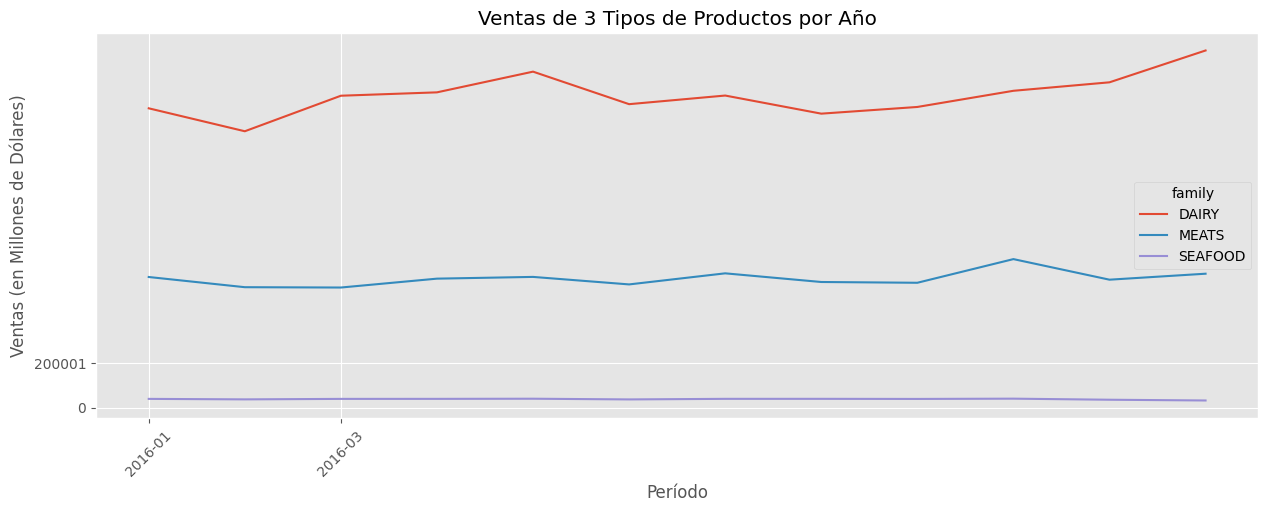

In [28]:
plt.style.use(
    'ggplot' 
)
ax = df.plot.line(
    figsize=(15, 5),
    title='Ventas de 3 Tipos de Productos por Año' 
)
ax.set_xlabel('Período')
ax.set_ylabel('Ventas (en Millones de Dólares)')

# Si quiero redefinir todas mis etiquetas
# Primero tengo que definir una lista con las posiciones 
# que tendran mis etiquetas en el eje X
posiciones = np.arange(0, len(df))
# Luego le digo al gráfico en que posiciones quiero tener mis etiquetas
ax.set_xticks(posiciones) # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html
# Finalmente defino las etiquetas que quiero
ax.set_xticklabels(
    df.index.values, 
    rotation=45 # Rotacion de las etiquetas
)

# Por ejemplo, si solo quisiera etiquetas en la primera y tercera posicion del EJE X haria lo siguiente:
ax.set_xticks([0, 2]) 
# ax.set_xticklabels(['Primera', 'Tercera'], rotation=45)

# Seaborn

[Text(0, 0, 'A'), Text(1, 0, 'B')]

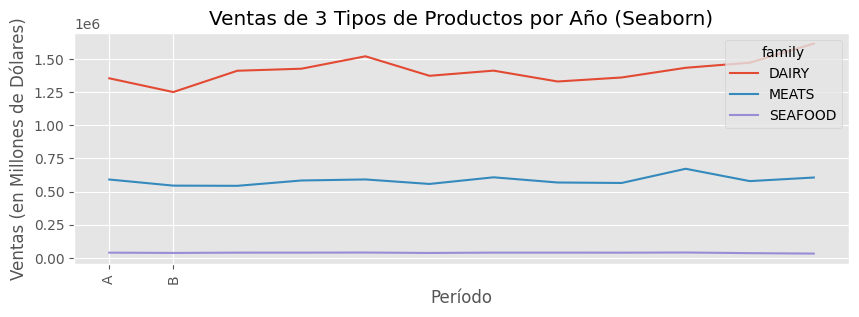

In [61]:
plt.figure(
    figsize=(10, 3)
)

# Almaceno mi figura en una variable
g = sns.lineplot(
    df2,
    x=df2.index.values,
    y='sales',
    hue='family'
)

g.set(
    xlabel='Período', 
    ylabel='Ventas (en Millones de Dólares)',
    title='Ventas de 3 Tipos de Productos por Año (Seaborn)',
)

# Misma logica
g.set_xticks([0, 1])
g.set_xticklabels(labels=['A', 'B'], rotation=90)

# Plotly

In [58]:
fig = px.line(
    df2, 
    x=df2.index.values,
    y="sales",
    color='family',
    width=800, 
    height=500,
    template='ggplot2',
    title='Ventas de 3 Tipos de Productos por Año', 
    labels={
        "x": "Periodo",
        "sales": "Ventas por año (en millones de $)",
        "family": "Tipo de Producto"
    }
)


fig.update_xaxes(
    tickangle=45,
    tickmode='array',
    tickvals=df.index.values
)

fig.update_yaxes(
    nticks=20, # Es un valor aproximado de cuantos ticks mostrar, al final plotly decide
    dtick=500000, # Espaciado entre cada tick (dada la escala del Eje Y)
    tickvals=[500000, 1000000] # Puedo decirle valores especificos a mostrar
)

fig.show()